##Тема “Обучение без учителя”


##Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [0]:
import numpy as np
import pandas as pd

In [0]:
from sklearn.datasets import load_boston

In [0]:
boston=load_boston()

In [37]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [0]:
data=boston.data

In [0]:
target = boston.target

In [0]:
feature_names = boston.feature_names

In [41]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

##Создадим датафреймы X и Y

In [0]:
X = pd.DataFrame(data,columns=feature_names)

In [43]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
y = pd.DataFrame(target,columns=['price'])

In [45]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


##Разбиваем данные тестовые и тренировачные датасеты

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Cтандартизируем признаки

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

##Создаем стандартизированные датафреймы

In [0]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

##Cнижаем размернность данных с помощью TSNE

In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

## Cтроим диаграмму рассеивания

In [0]:
import matplotlib.pyplot as plt


In [0]:
plt.style.use('fivethirtyeight')

In [0]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

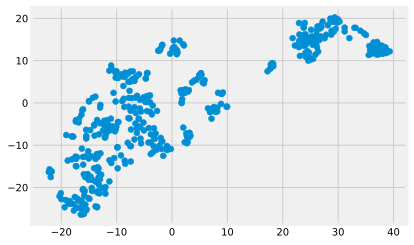

In [56]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])


##Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


## Разбиваем на класстеры

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

## Прогнозируем на тренировачной модели

In [0]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [60]:
pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

##Cтроим диаграмму рассеивания

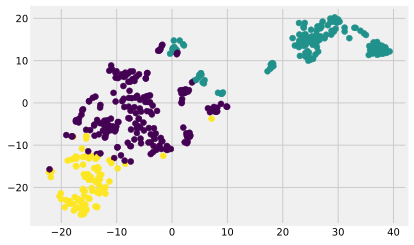

In [61]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

Вычисляем средние значение PRICE и СRIM Для класстеров

In [63]:
for i in range(3):
  mean_price = y_train[labels_train==i].mean()[0]
  mean_crim  = X_train.loc[labels_train==i, 'CRIM'].mean()
  print('Cluster {}: mean_price = {}, mean_crim = {}'.format(i, '%0.2f' % mean_price, '%0.2f' % mean_crim))

Cluster 0: mean_price = 24.96, mean_crim = 0.42
Cluster 1: mean_price = 16.17, mean_crim = 10.80
Cluster 2: mean_price = 27.79, mean_crim = 0.07


##* Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [0]:
labels_test = kmeans.fit_predict(X_test_scaled)

In [65]:
pd.value_counts(labels_test)

1    50
0    38
2    14
dtype: int64

In [0]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

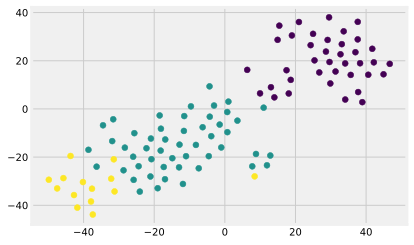

In [67]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

In [68]:
for i in range(3):
  mean_price = y_test[labels_test==i].mean()[0]
  mean_crim  = X_test.loc[labels_test==i, 'CRIM'].mean()
  print('Cluster {}: mean_price = {}, mean_crim = {}'.format(i, '%0.2f' % mean_price, '%0.2f' % mean_crim))

Cluster 0: mean_price = 16.71, mean_crim = 9.42
Cluster 1: mean_price = 21.65, mean_crim = 0.22
Cluster 2: mean_price = 33.87, mean_crim = 0.09
